# 📊 Exploration des données agricoles

Ce notebook présente une exploration des données fournies pour le projet.
- Importation des données
- Nettoyage et vérifications
- Visualisations statistiques avec Seaborn et Matplotlib
- Analyse des corrélations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Options d'affichage
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [2]:
# Chargement des fichiers
train = pd.read_csv("farms_train.csv")
test = pd.read_csv("farms_test.csv")
soumission = pd.read_csv("ex_soumission.csv")

# Aperçu des données
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Soumission shape:", soumission.shape)

train.head()

Train shape: (401, 7)
Test shape: (119, 6)
Soumission shape: (119, 2)


,DIFF,R2,R7,R8,R17,R22,R32
0,0,0.705,0.290,0.4826,0.0481,1.35980,0.2941
1,1,0.893,0.201,0.1370,0.0509,0.11910,0.4505
2,1,0.832,0.418,0.2637,0.0468,0.09821,0.4070
3,0,0.000,1.291,0.9018,0.0681,0.13350,0.3574
4,1,0.801,0.213,0.5284,0.0186,0.14000,0.3005


In [3]:
# Vérification des valeurs manquantes
print("Valeurs manquantes dans train :\n", train.isnull().sum())
print("\nValeurs manquantes dans test :\n", test.isnull().sum())

Valeurs manquantes dans train :
 DIFF    0
R2      0
R7      0
R8      0
R17     0
R22     0
R32     0
dtype: int64

Valeurs manquantes dans test :
 R2     0
R7     0
R8     0
R17    0
R22    0
R32    0
dtype: int64


In [4]:
# Statistiques descriptives
train.describe()

,DIFF,R2,R7,R8,R17,R22,R32
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,0.526185,0.522449,0.648469,0.375933,0.064341,0.705929,0.249785
std,0.499938,0.302731,0.474321,0.329540,0.026580,0.671149,0.130242
min,0.000000,0.000000,0.051300,-0.703000,0.012000,0.060990,-0.162000
25%,0.000000,0.298000,0.317000,0.137200,0.044900,0.313000,0.167800
50%,1.000000,0.599000,0.555000,0.283100,0.061200,0.526300,0.269600
75%,1.000000,0.759000,0.872000,0.505400,0.081700,0.863100,0.337300
max,1.000000,0.950000,2.557000,1.849400,0.194000,3.939700,0.660800


/var/folders/cs/0qh8_yzs471_3cr3xkmzm7fc0000gn/T/ipykernel_57267/2257222984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DIFF", data=train, palette="Set2")


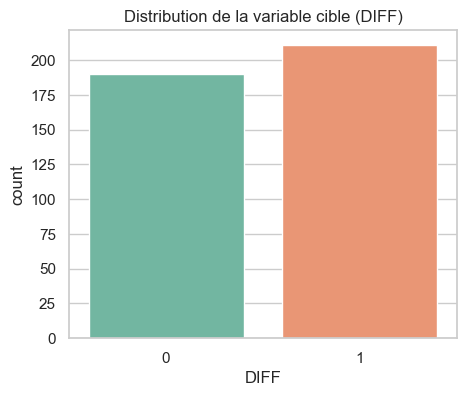

In [5]:
# Distribution de la variable cible
plt.figure(figsize=(5,4))
sns.countplot(x="DIFF", data=train, palette="Set2")
plt.title("Distribution de la variable cible (DIFF)")
plt.show()

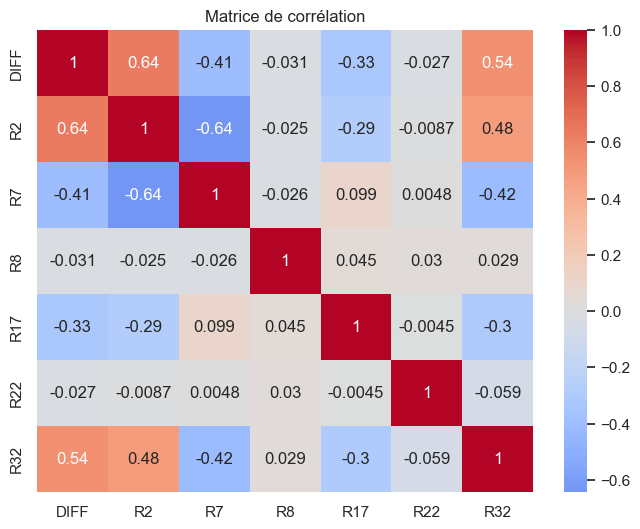

In [6]:
# Matrice de corrélation
plt.figure(figsize=(8,6))
corr = train.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()

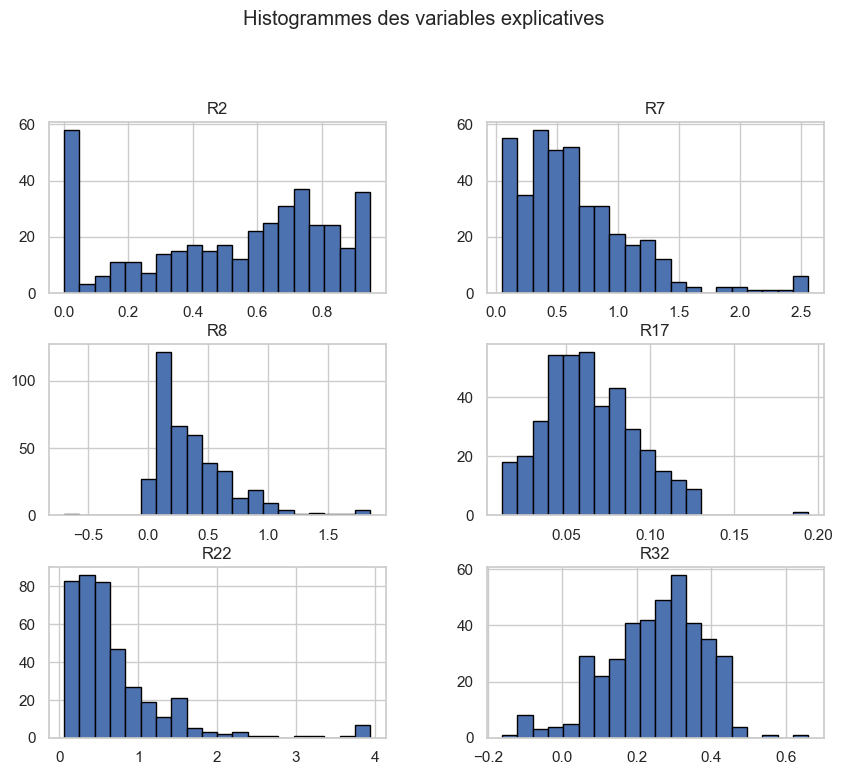

In [7]:
# Histogrammes des variables explicatives
train.drop(columns="DIFF").hist(figsize=(10,8), bins=20, edgecolor="black")
plt.suptitle("Histogrammes des variables explicatives", y=1.02)
plt.show()

/var/folders/cs/0qh8_yzs471_3cr3xkmzm7fc0000gn/T/ipykernel_57267/2432835493.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DIFF", y=col, data=train, palette="Set2")
/var/folders/cs/0qh8_yzs471_3cr3xkmzm7fc0000gn/T/ipykernel_57267/2432835493.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DIFF", y=col, data=train, palette="Set2")
/var/folders/cs/0qh8_yzs471_3cr3xkmzm7fc0000gn/T/ipykernel_57267/2432835493.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DIFF", y=col, data=train, palette="Set2")
/var/folders/cs/0qh8_yzs471_

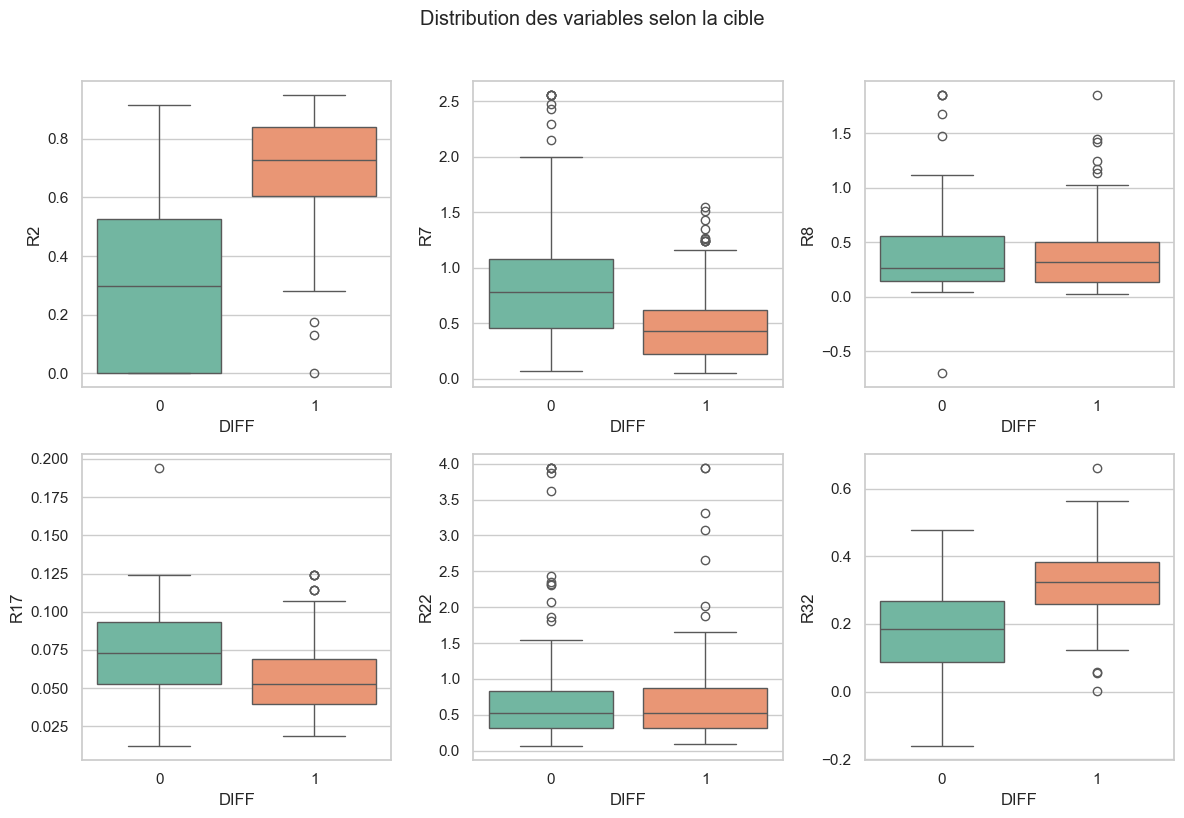

In [8]:
# Boxplots par rapport à la cible
features = ["R2", "R7", "R8", "R17", "R22", "R32"]
plt.figure(figsize=(12,8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="DIFF", y=col, data=train, palette="Set2")
plt.suptitle("Distribution des variables selon la cible", y=1.02)
plt.tight_layout()
plt.show()

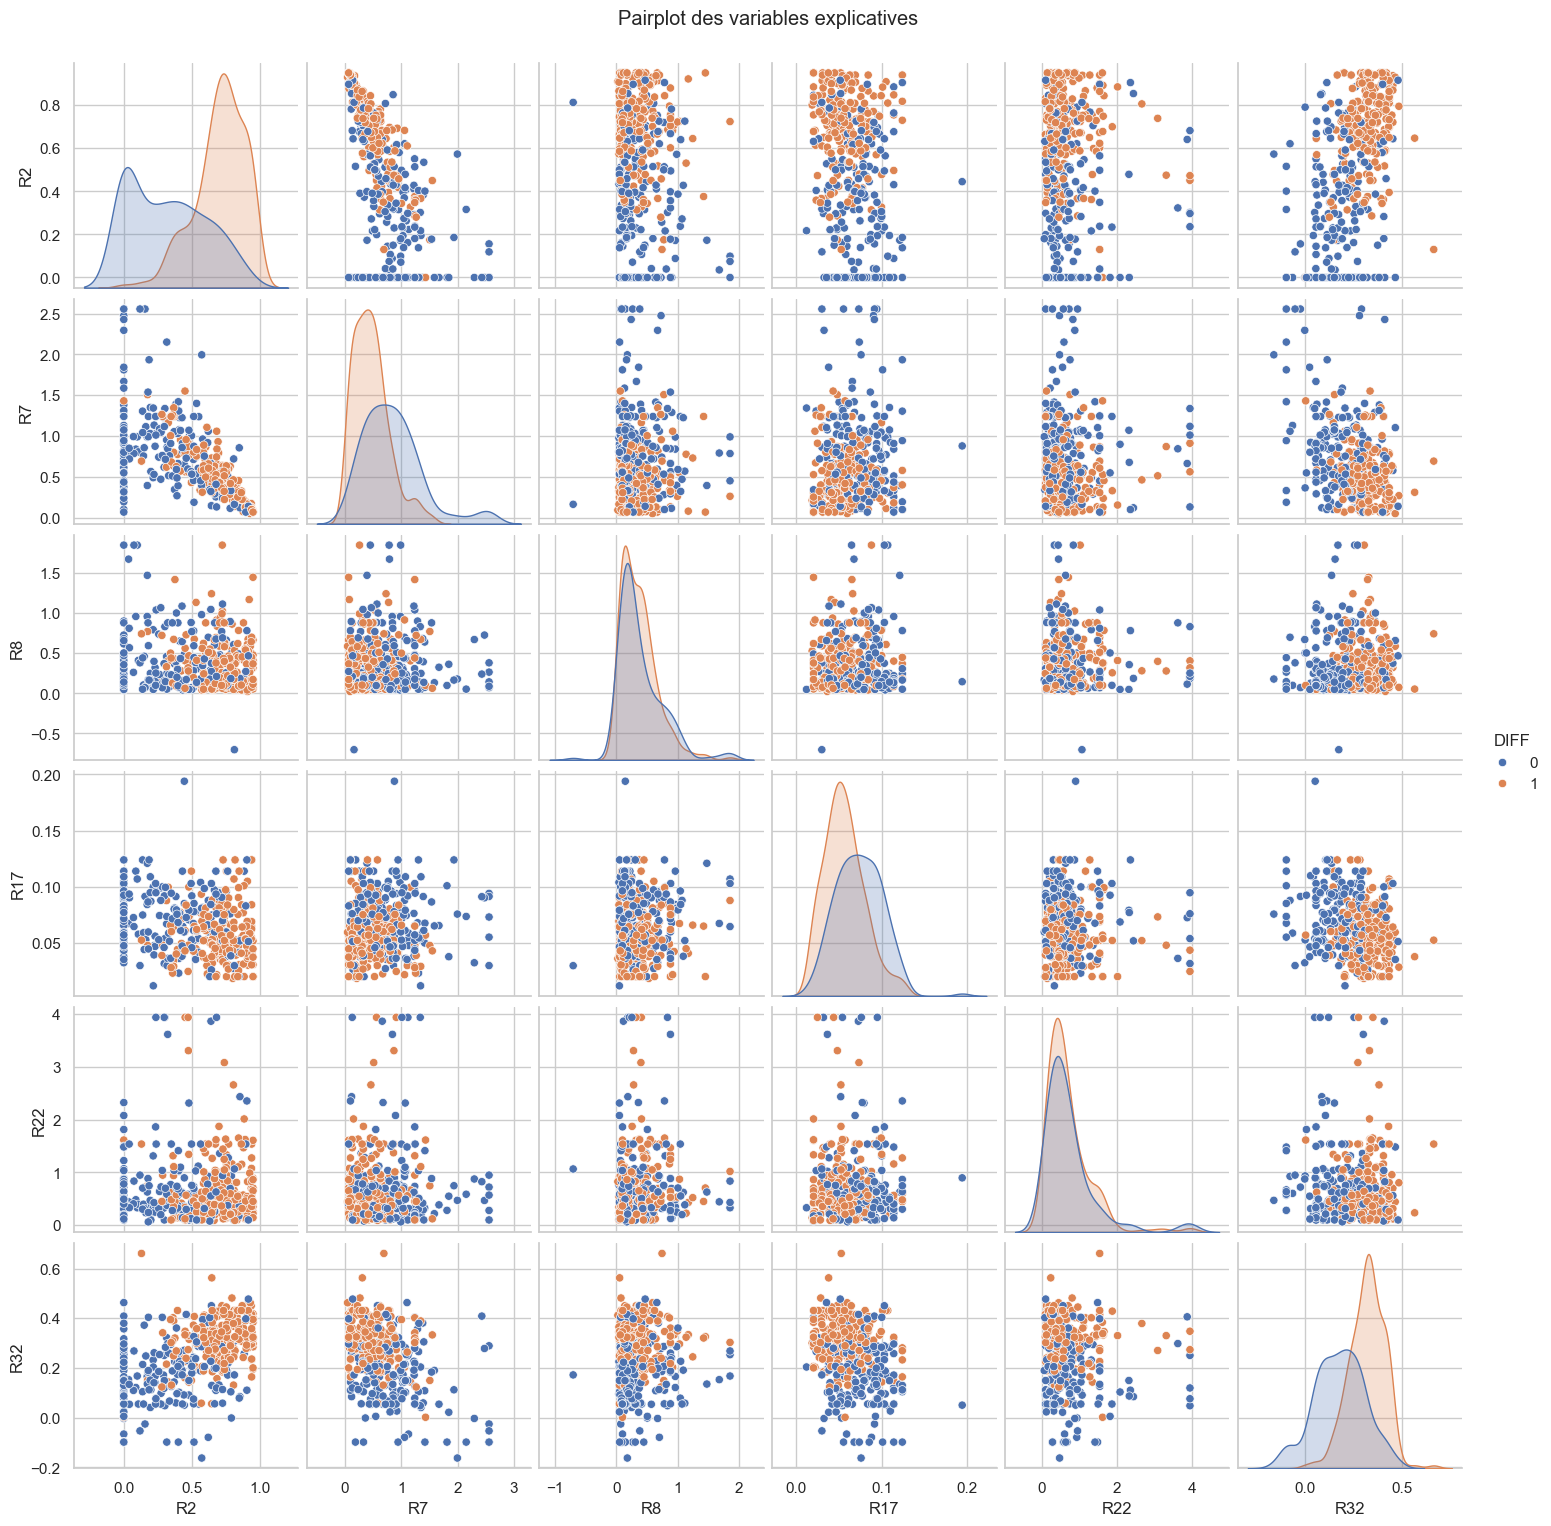

In [9]:
# Pairplot des variables
sns.pairplot(train, hue="DIFF", vars=["R2", "R7", "R8", "R17", "R22", "R32"], diag_kind="kde")
plt.suptitle("Pairplot des variables explicatives", y=1.02)
plt.show()

🔎 Analyse par variable (par rapport à DIFF)
	•	R2 :
	•	Les points pour DIFF=0 et DIFF=1 semblent avoir des distributions qui se chevauchent partiellement.
	•	Mais il y a une tendance : les DIFF=1 paraissent plus fréquents quand R2 est élevé (> 0.7).
	•	R7 :
	•	Forte dispersion avec quelques valeurs très grandes (>2).
	•	Les DIFF=0 semblent un peu plus présents pour des valeurs plus élevées.
	•	R8 :
	•	On observe une séparation partielle : les DIFF=0 sont un peu plus concentrés sur les valeurs basses, et les DIFF=1 sur des valeurs moyennes/hautes.
	•	Variable intéressante pour discriminer.
	•	R17 :
	•	Distribution très resserrée entre 0.01 et 0.20.
	•	Pas de séparation nette, mais on peut voir des petites différences de densité.
	•	R22 :
	•	Forte dispersion avec des valeurs extrêmes (>3).
	•	Comme pour R7, les deux classes se mélangent beaucoup.
	•	R32 :
	•	Plus discriminant que d’autres :
	•	DIFF=0 semble concentré autour de valeurs faibles.
	•	DIFF=1 un peu plus haut.

⸻

🔗 Relations entre variables
	•	Certaines variables sont corrélées :
	•	Par ex. R2 ↔ R8 semblent positivement liées (quand R2 ↑, R8 ↑).
	•	R22 et R7 présentent aussi des points qui suivent une certaine tendance.
	•	La séparation des classes n’est pas nette en 2D (les nuages de points se chevauchent), ce qui est classique.
👉 Cela suggère qu’un modèle multivarié (logistique, arbre, forêt aléatoire, XGBoost, etc.) sera nécessaire pour bien combiner les signaux.